In [1]:
# import gee
import geoFunctions as gf
import ee
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#authentificate, generate token and allow access rights
ee.Authenticate()
ee.Initialize()

In [3]:
# area of interest in olomouc, czechia
aoi = ee.Geometry.Rectangle(17.22,
                            49.61,
                            17.26,
                            49.63)

In [4]:
# set the image paramters
collection = 'COPERNICUS/S2'
# set time frame
start_date = '2023-01-01'
end_date = '2023-12-31'
# set aggregraion method
aggregation_method = 'mean'

In [5]:
# mean image for sentinel2
mean_image = gf.aggregate_image_collection(collection, start_date, end_date, aggregation_method)
print(mean_image)

ee.Image({
  "functionInvocationValue": {
    "functionName": "reduce.mean",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "ImageCollection.load",
                "arguments": {
                  "id": {
                    "constantValue": "COPERNICUS/S2"
                  }
                }
              }
            },
            "filter": {
              "functionInvocationValue": {
                "functionName": "Filter.dateRangeContains",
                "arguments": {
                  "leftValue": {
                    "functionInvocationValue": {
                      "functionName": "DateRange",
                      "arguments": {
                        "end": {
                          "constantValue": "2023-12-31"
                        },
                       

C:\Users\gerno\miniconda3\envs\a4_gee\Lib\site-packages\ee\deprecation.py:204: DeprecationWarning: 

Attention required for COPERNICUS/S2! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2

  warnings.warn(warning, category=DeprecationWarning)


In [6]:
# testing evi calulcation
blue_band = gf.select_bands(mean_image, 'BLUE')
red_band = gf.select_bands(mean_image, 'RED')
nir_band = gf.select_bands(mean_image, 'NIR')

evi = gf.calculateEVI(mean_image, blue_band, red_band, nir_band)
print(evi)

ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.rename",
    "arguments": {
      "input": {
        "functionInvocationValue": {
          "functionReference": {
            "functionInvocationValue": {
              "functionName": "Image.parseExpression",
              "arguments": {
                "argName": {
                  "constantValue": "DEFAULT_EXPRESSION_IMAGE"
                },
                "expression": {
                  "constantValue": "2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))"
                },
                "vars": {
                  "constantValue": [
                    "DEFAULT_EXPRESSION_IMAGE",
                    "NIR",
                    "RED",
                    "BLUE"
                  ]
                }
              }
            }
          },
          "arguments": {
            "BLUE": {
              "functionInvocationValue": {
                "functionName": "Image.select",
                "arguments"

In [7]:
# Calculate the time series for EVI
time_series_evi = gf.calculate_time_series_EVI(collection, start_date, end_date, aoi)

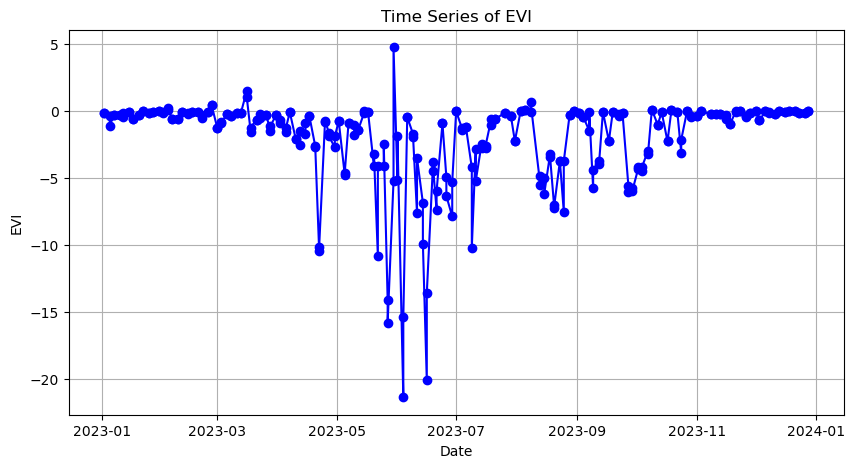

In [8]:
# Plot the time series for EVI
gf.plot_time_series_EVI(time_series_evi)

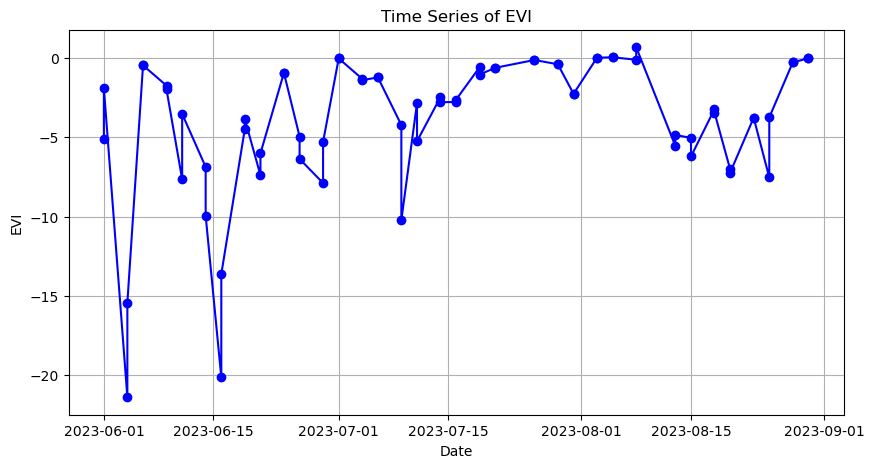

In [9]:
#same with different time period
start_date = '2023-06-01'
end_date = '2023-08-31'
# Calculate the time series
time_series_evi = gf.calculate_time_series_EVI(collection, start_date, end_date, aoi)
# Plotting
gf.plot_time_series_EVI(time_series_evi)